In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle/

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
100% 427M/428M [00:12<00:00, 38.0MB/s]
100% 428M/428M [00:12<00:00, 35.5MB/s]


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_burn_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [ ]:
paths =[]
labels = []
# _ fileholder for directory
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
      paths.append(os.path.join(dirname, filename))
      label = filename.split('_')[-1]
      label = label.split('.')[0]
      labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is loaded')

Dataset is loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_peg_angry.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_hall_angry.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_thumb_angry.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_road_angry.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_lose_angry.wav']

In [ ]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [ ]:
#Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,angry
1,/content/tess toronto emotional speech set dat...,angry
2,/content/tess toronto emotional speech set dat...,angry
3,/content/tess toronto emotional speech set dat...,angry
4,/content/tess toronto emotional speech set dat...,angry


In [ ]:
df['label'].value_counts()

,count
label,
angry,400
ps,400
happy,400
disgust,400
sad,400
fear,400
neutral,400


In [ ]:
df['label_count'] = df['label'].value_counts()

In [ ]:
df.drop('label_count',axis = 1)

,speech,label
0,/content/tess toronto emotional speech set dat...,angry
1,/content/tess toronto emotional speech set dat...,angry
2,/content/tess toronto emotional speech set dat...,angry
3,/content/tess toronto emotional speech set dat...,angry
4,/content/tess toronto emotional speech set dat...,angry
...,...,...
2795,/content/tess toronto emotional speech set dat...,angry
2796,/content/tess toronto emotional speech set dat...,angry
2797,/content/tess toronto emotional speech set dat...,angry
2798,/content/tess toronto emotional speech set dat...,angry


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

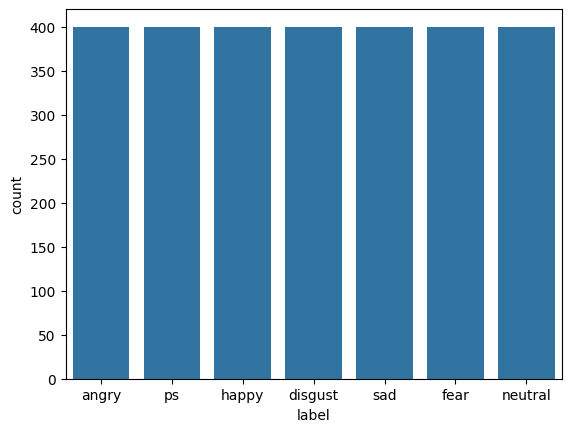

In [ ]:
sns.countplot(data=df,x='label')

In [ ]:
def waveplot(data, sr, emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.waveshow(data, sr=sr)
  plt.show()

In [ ]:
def spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


In [ ]:
df.drop('label_count', axis=1, inplace = True)

In [ ]:
df.head()
print(df['label'].unique())

['angry' 'ps' 'happy' 'disgust' 'sad' 'fear' 'neutral']


In [ ]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_peg_angry.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_hall_angry.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_thumb_angry.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_gap_angry.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_name_angry.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_date_angry.wav'],
      dtype=object)

In [ ]:
emotion = 'fear'

In [ ]:
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

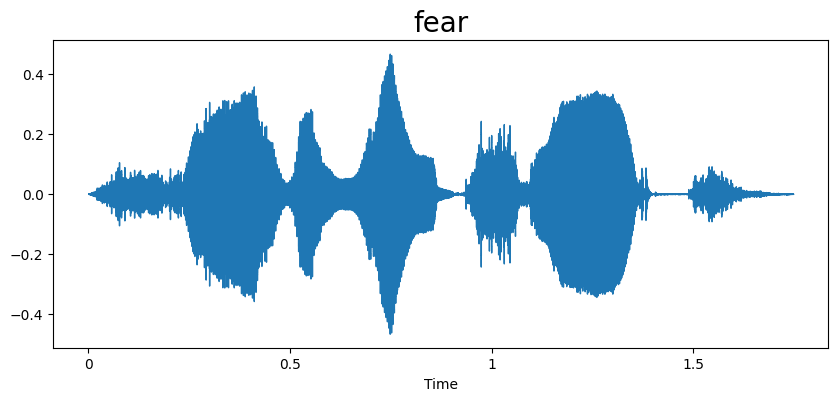

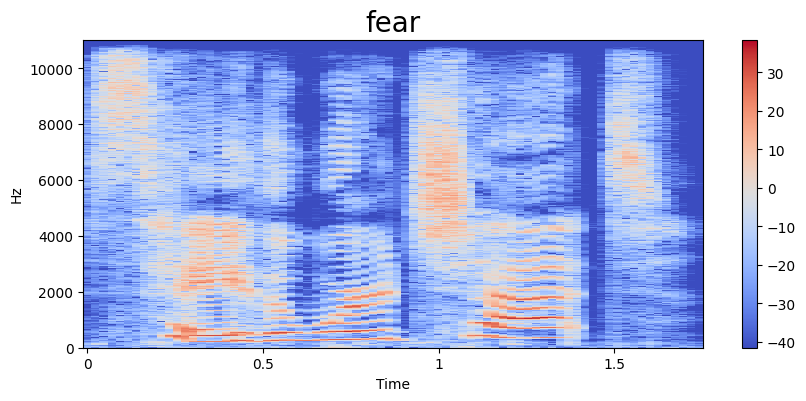

In [ ]:
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

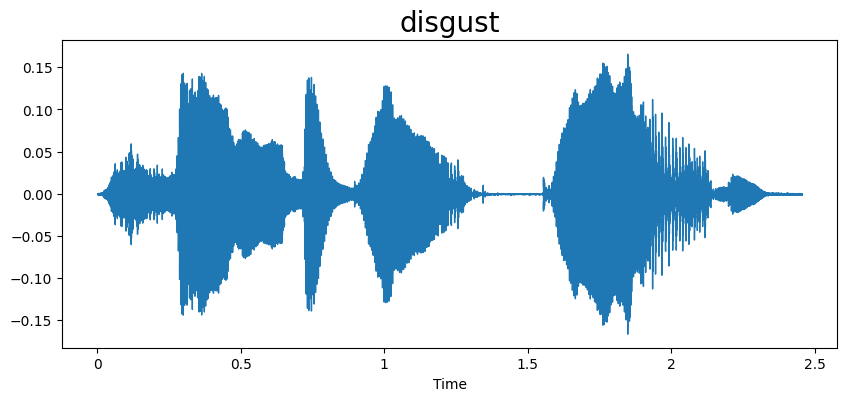

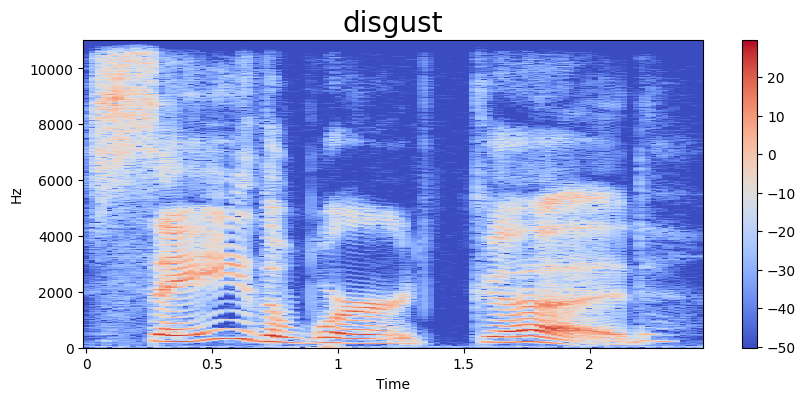

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

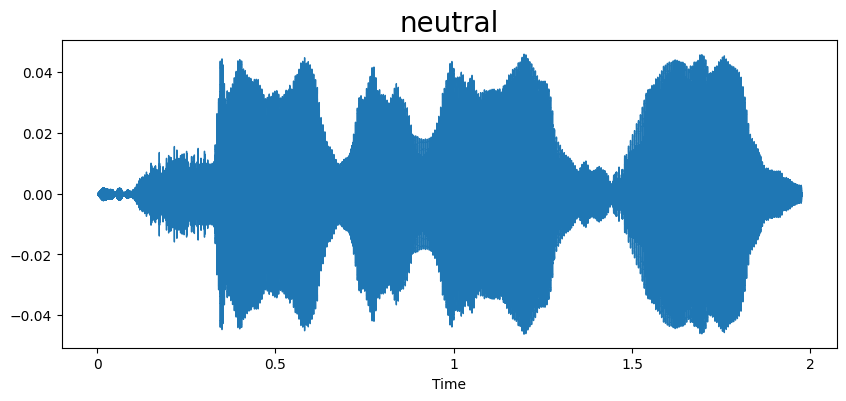

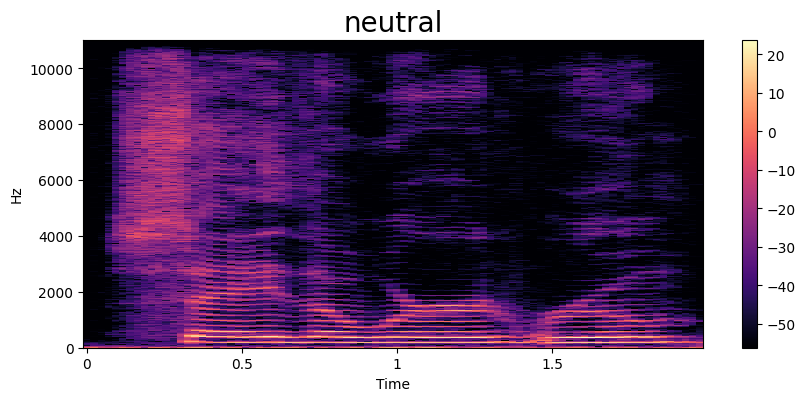

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

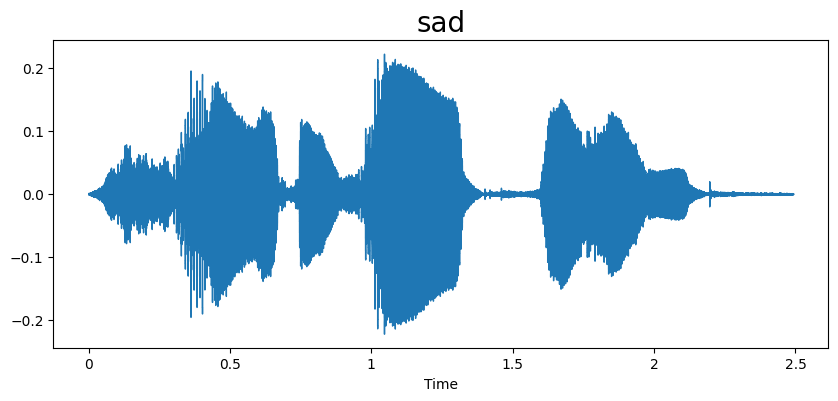

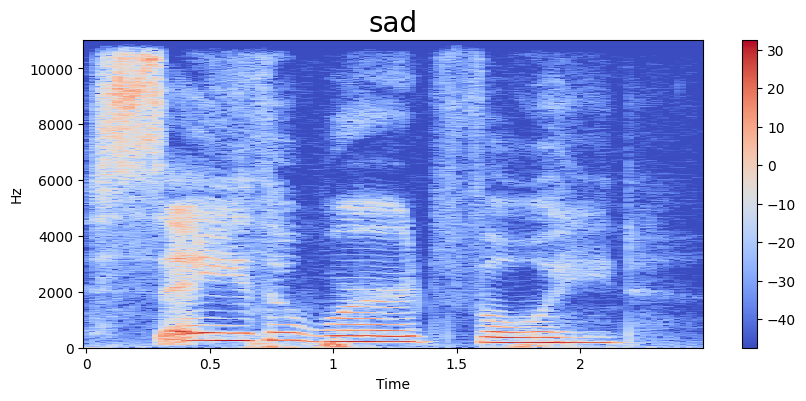

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

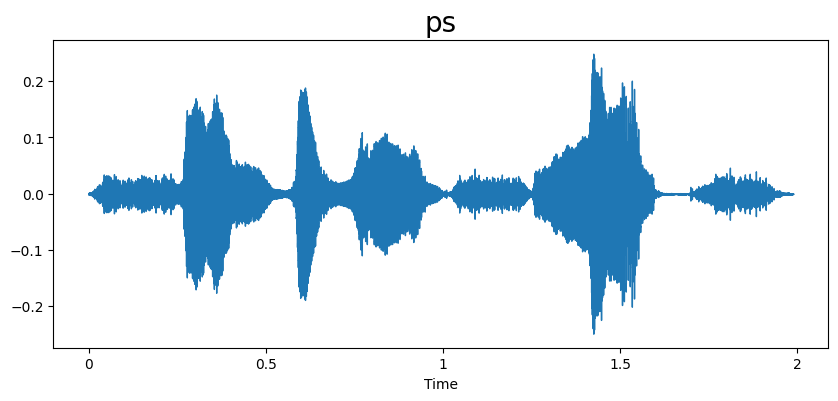

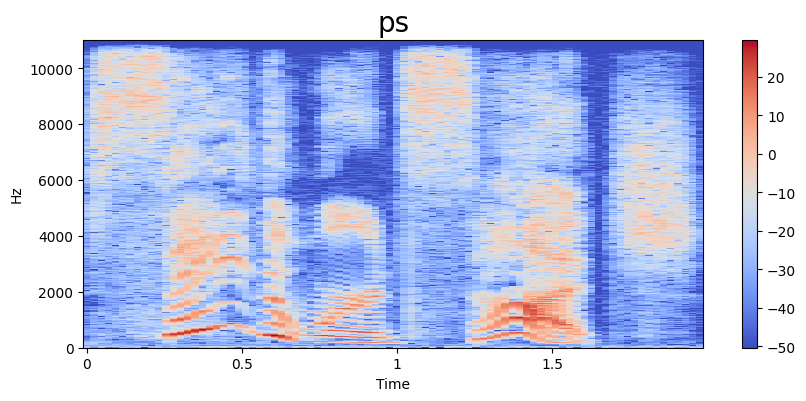

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

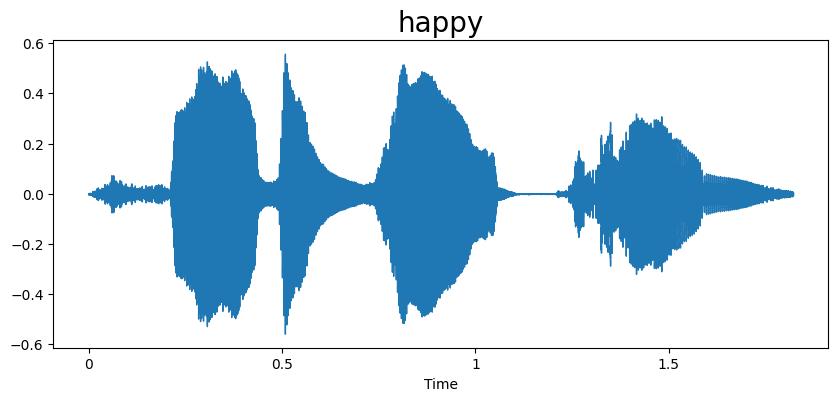

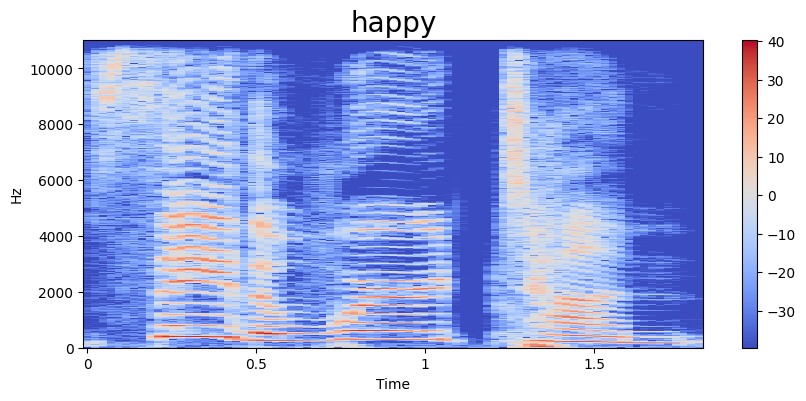

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Feature Extraction**

In [ ]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration=3, offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.15304657e+02,  8.15061111e+01, -5.90106249e+00, -1.16531563e+00,
        1.49794090e+00,  7.62098455e+00, -2.95427265e+01, -1.01863356e+01,
       -1.55911245e+01, -4.31961679e+00, -1.44578016e+00,  2.12607563e-01,
        3.96969527e-01,  1.01159251e+00, -1.12728447e-01, -1.00892377e+00,
       -6.78602266e+00, -1.97202754e+00, -5.05674458e+00, -1.21203728e+01,
       -2.26096416e+00, -1.38849950e+00, -3.85491657e+00,  1.07494011e+01,
        8.10441017e+00,  1.84317684e+01,  1.18784075e+01,  1.70502872e+01,
        1.45659466e+01,  1.56348219e+01,  8.54758453e+00,  7.66160822e+00,
        5.50558424e+00,  4.23783445e+00,  9.01977825e+00,  5.36226702e+00,
        8.31169128e+00,  8.19802189e+00, -1.23748004e+00,  1.49522305e+00],
      dtype=float32)

In [ ]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))


In [ ]:
x_mfcc

,speech
0,"[-415.30466, 81.50611, -5.9010625, -1.1653156,..."
1,"[-393.31836, 92.926285, 4.4558163, -23.756584,..."
2,"[-418.5793, 73.231026, 9.666024, -16.868618, -..."
3,"[-421.6649, 102.702255, 10.90602, -31.783535, ..."
4,"[-431.74622, 77.24131, 8.511243, -3.0904095, -..."
...,...
2795,"[-294.5169, 22.169518, 17.417767, 10.242752, -..."
2796,"[-333.38745, 63.86061, -3.2831573, 17.142277, ..."
2797,"[-289.04367, 79.062164, -18.213083, 13.74042, ..."
2798,"[-341.13345, 61.820747, -22.043692, 32.27892, ..."


In [ ]:
X = [x for x in x_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
##input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()
y.shape

(2800, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

***Create the LSTM Model***


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),#rectifier linear unit
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
Model: "Sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - accuracy: 0.2303 - loss: 1.8754 - val_accuracy: 0.5696 - val_loss: 1.1388
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - accuracy: 0.5136 - loss: 1.1808 - val_accuracy: 0.7500 - val_loss: 0.6566
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.6720 - loss: 0.8350 - val_accuracy: 0.8375 - val_loss: 0.3842
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 184ms/step - accuracy: 0.8395 - loss: 0.4825 - val_accuracy: 0.9071 - val_loss: 0.3204
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - accuracy: 0.8901 - loss: 0.3750 - val_accuracy: 0.9411 - val_loss: 0.1848
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - accuracy: 0.9064 - loss: 0.3100 - val_accuracy: 0.9321 - val_loss: 0.2236
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.8972 - loss: 0.3466 - val_accuracy: 0.9571 - val_loss: 0.1430
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.9243 - loss: 0.2747 - val_accura

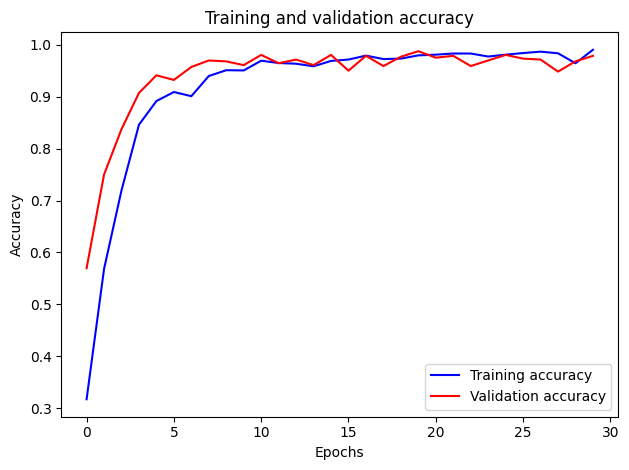

In [ ]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.tight_layout()
plt.legend()
plt.show()

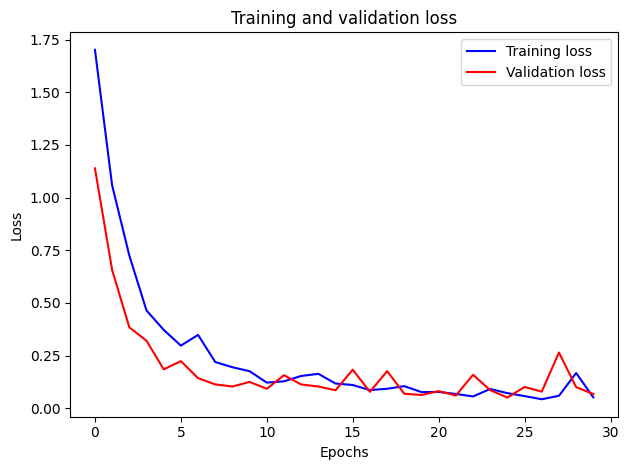

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

#print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[67  0  0  2  0  1  0]
 [ 0 76  0  1  0  0  0]
 [ 0  0 74  0  0  0  0]
 [ 0  0  0 99  0  2  0]
 [ 0  0  0  0 79  0  0]
 [ 0  5  0  0  0 81  0]
 [ 0  1  0  0  0  0 72]]


In [ ]:
#Print the classification report
target_names = ['angry','disgust','fear','happy','neutral','ps','sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

       angry       1.00      0.96      0.98        70
     disgust       0.93      0.99      0.96        77
        fear       1.00      1.00      1.00        74
       happy       0.97      0.98      0.98       101
     neutral       1.00      1.00      1.00        79
          ps       0.96      0.94      0.95        86
         sad       1.00      0.99      0.99        73

    accuracy                           0.98       560
   macro avg       0.98      0.98      0.98       560
weighted avg       0.98      0.98      0.98       560



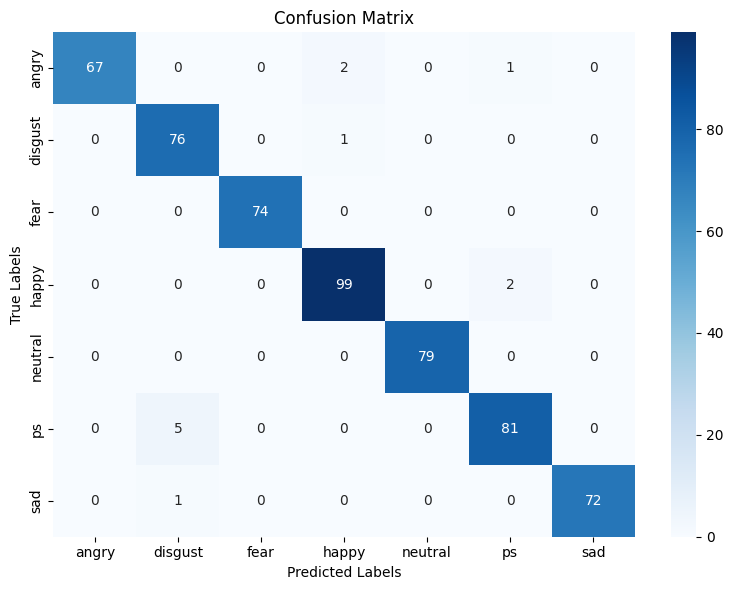

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()